In [1]:
# Cargar  paquetes
import cv2
import pytesseract
import matplotlib.pyplot as plt
# Para windows se tiene que establecer la direccion
pytesseract.pytesseract.tessseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# Para linux no es necesario


In [2]:
placa = []
img = cv2.imread('auto.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

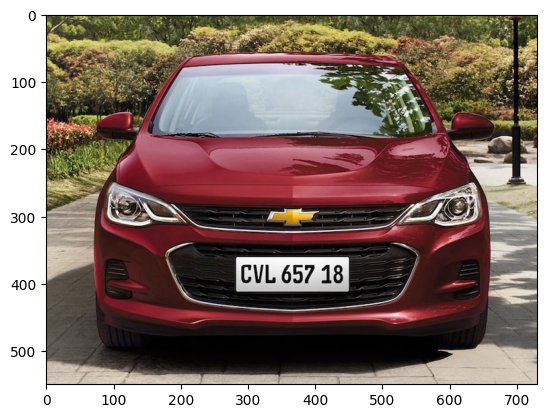

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

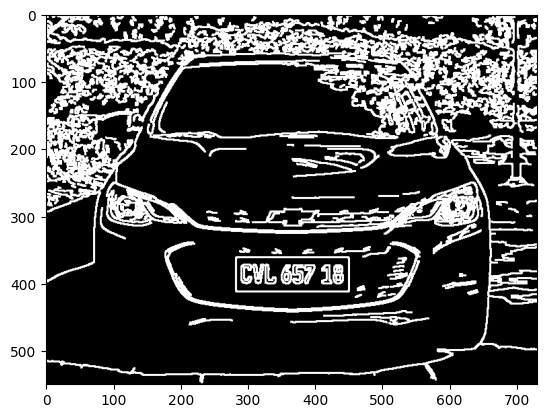

In [4]:
gray = cv2.blur(gray, (3,3))
canny = cv2.Canny(gray, 130, 200)
canny = cv2.dilate(canny, None, iterations=1)
plt.imshow(canny, cmap='gray');

In [5]:
# Deteccion de contornos con OpenCV
contorno, _ = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
#for c in contorno:
    #print(c)

In [7]:
#for c in contorno:
    #area = cv2.contourArea(c)
    #print(area)

In [8]:
for c in contorno:
    area = cv2.contourArea(c)
    x , y, w, h = cv2.boundingRect(c)
    epsilon = 0.09 * cv2.arcLength(c, True)
    aprox = cv2.approxPolyDP(c, epsilon, True)

    if len(aprox)==4 and area >= 9000:
        print('area', area)
        print('x:', x)
        print('y:', y)
        print('w:', w)
        print('h:', h)
        relAspec = float(w)/h
        print('Relacion de aspectos:', relAspec)
        cv2.drawContours(img, [aprox], 0, (0,255,0), 3)

        if relAspec > 3:
            placa = gray[y:y+h, x:x+w]
            texto = pytesseract.image_to_string(placa, config='--psm 11'.strip())
            print('Placa:', texto)
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 3)
            cv2.putText(img, texto, (x+20, y+10), 1, 2.2, (0,255,0), 3)

area 9007.0
x: 281
y: 360
w: 171
h: 54
Relacion de aspectos: 3.1666666666666665


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));